# ISLR Ch.4 Exercise

## MSSP MA679

## Sky Liu

## 4.7.6 Suppose we collect data for a group of students in a statistics class with variables $X_1$ = hours studied, $X_2$= undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $\beta_0$ = −6, $\beta_1$ = 0.05, $\beta_2$ = 1.

### part a
Since $\beta_0$ = −6, $\beta_1$ = 0.05, $\beta_2$ = 1, $X_1$ = 40, $X_2$= 3.5

$p(X) = \frac {\exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}
             {1 + \exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}$
             
$\ \ \ \ \ \ \ \  = \frac {\exp(-6 + 0.05*40 + 3.5)} {1 + \exp(-6 + 0.05*40 + 3.5)} = 37.75\%$

### part b
$p(X) = 0.5  = \frac {\exp(-6 + 0.05 X_1 + 3.5)} {1 + \exp(-6 + 0.05 X_1 + 3.5)} $
             
We obtain $ X_1 = 50$

## 4.7.8 Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neigh- bors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

Using KNN(K=1), the training error rate would be 0% becuase the result would always be the training point itself. Since the averaged error rate over both test and training data sets, we obtain test error rate as 18%*2-0% = 36%. Thus, logistic regression provides us a better test error rate.

## 4.7.9 This problem has to do with _odds_.

### part a. On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

$\frac{P(X)}{1-P(X)} = 0.37$

We obtain, $P(X) = 0.27$

### part b. Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will de- fault?

$\frac{P(X)}{1-P(X)} = \frac{0.16}{1-0.16} = 0.19$



## 4.7.10
### part a




In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from numpy import corrcoef
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from scipy import stats
from sklearn.datasets import load_boston


wk = pd.read_csv('Weekly.csv')
print( "There are", wk.shape[0], "rows and ", wk.shape[1], "columns in Weekly dataset." )
wk.head()

There are 1089 rows and  9 columns in Weekly dataset.


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


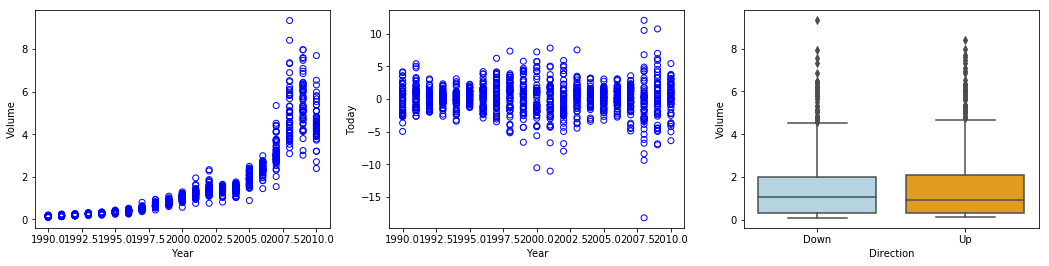

In [2]:

fig, (ax11,ax22,ax33) = plt.subplots(1,3,figsize=(18,4))



#  Volume vs. Year
ax11.scatter(wk.Year.values, wk.Volume.values, facecolors='none', edgecolors='b' )
ax11.set_xlabel('Year')
ax11.set_ylabel('Volume')

# Today vs. Year
ax22.scatter(wk.Year.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax22.set_xlabel('Year')
ax22.set_ylabel('Today')


# Plot Lag1 vs Today's return
c_palette = {'Down':'lightblue', 'Up':'orange'}
sns.boxplot('Direction', 'Volume', data=wk, orient='v', ax=ax33, palette=c_palette)


Text(0, 0.5, 'Today')

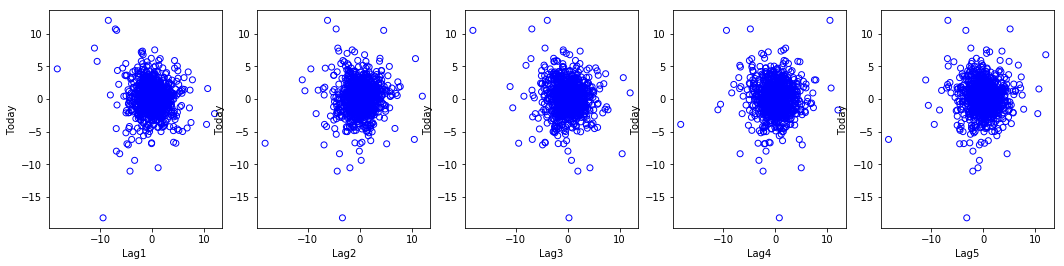

In [3]:

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(18,4))


# Plot Lag1 vs Today
ax1.scatter(wk.Lag1.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax1.set_xlabel('Lag1 ')
ax1.set_ylabel('Today')

# Plot Lag2 vs Today
ax2.scatter(wk.Lag2.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax2.set_xlabel('Lag2')
ax2.set_ylabel('Today')


# Plot Lag3 vs Today
ax3.scatter(wk.Lag3.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax3.set_xlabel('Lag3')
ax3.set_ylabel('Today')

# Plot Lag4 vs Today
ax4.scatter(wk.Lag4.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax4.set_xlabel('Lag4')
ax4.set_ylabel('Today')


# Plot Lag5 vs Today
ax5.scatter(wk.Lag5.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax5.set_xlabel('Lag5')
ax5.set_ylabel('Today')

Positive relationship between Volume and Year. No obvious correlation between Today and Lags, Year and Today.

### part b 

In [4]:

pred = sm.add_constant(wk[wk.columns[1:7]])
dirc = np.array([1 if el=='Up' else 0 for el in wk.Direction.values])

glm1 = sm.Logit(dirc,pred)
glm1results=glm1.fit()
print(glm1results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:                0.006580
Time:                        21:27:08   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Only Lag2 has a 95% confidence interval containing zero

### part c

In [5]:


dirc_predicted = glm1results.predict(pred)
dirc_predicted= np.array(dirc_predicted > 0.5, dtype=float)
Ctable = np.histogram2d(dirc_predicted, dirc, bins=2)[0]
print(pd.DataFrame(Ctable, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(Ctable[0,0]+Ctable[1,1])/np.sum(Ctable))

       Down     Up
Down   54.0   48.0
Up    430.0  557.0


Error Rate = 0.43893480257116624


percision  = $\frac{557}{430+557}$ = $56\%$

type one error (false positive rate) = $\frac{430}{430+54} = 89\%$ 

type two error (false negative rate) = $\frac{48}{557+48} = 8\%$ 

sensitivity = 1 - 8% = 92%

The model has a very high false positive rate.

### part d


In [6]:
predTest = sm.add_constant(wk[wk.Year > 2008].Lag2)
dircTest = np.array([1 if el=='Up' else 0 for el in wk[wk.Year > 2008].Direction])

predTrain = sm.add_constant(wk[wk.Year <= 2008].Lag2)
dircTrain = np.array([1 if el=='Up' else 0 for el in wk[wk.Year <= 2008].Direction])

glmTrain = sm.Logit(dircTrain,predTrain)
glmTrainresults=glmTrain.fit()
print(glmTrainresults.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:                0.003076
Time:                        21:27:08   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [7]:

dircTrain_predicted = glmTrainresults.predict(predTest)
dircTrain_predicted= np.array(dircTrain_predicted > 0.5, dtype=float)
CtableTrain = np.histogram2d(dircTrain_predicted, dircTest, bins=2)[0]
print(pd.DataFrame(CtableTrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableTrain[0,0]+CtableTrain[1,1])/np.sum(CtableTrain))

      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375


The error rate has decreased, but the type one error is still large.

### part e

In [8]:
LDAClf = LDA(solver='lsqr', store_covariance=True)

PredLDA_train = wk[wk.Year <= 2008].Lag2.values
PredLDA_train = PredLDA_train.reshape((len(PredLDA_train),1))

PredLDA_test = wk[wk.Year > 2008].Lag2.values
PredLDA_test = PredLDA_test.reshape((len(PredLDA_test),1))

LDAClf.fit(PredLDA_train, dircTrain)
print('Priors = ', LDAClf.priors_ )
print('Class Means = ', LDAClf.means_[0], LDAClf.means_[1])
print('Coeffecients = ', LDAClf.coef_)
print('\n')

Priors =  [0.44771574 0.55228426]
Class Means =  [-0.03568254] [0.26036581]
Coeffecients =  [[0.05780187]]




In [9]:

dircTrainLDA_predicted = LDAClf.predict(PredLDA_test)
dircTrainLDA_predicted= np.array(dircTrainLDA_predicted > 0.5, dtype=float)

CtableLDATrain = np.histogram2d(dircTrainLDA_predicted, dircTest, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(CtableLDATrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableLDATrain[0,0]+CtableLDATrain[1,1])/np.sum(CtableLDATrain))

CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375


The result of LDA is the same as the result of logistic regression

### part f

In [10]:
QDAClf = QDA( store_covariance=True)

PredQDA_train = wk[wk.Year <= 2008].Lag2.values
PredQDA_train = PredQDA_train.reshape((len(PredQDA_train),1))

PredQDA_test = wk[wk.Year > 2008].Lag2.values
PredQDA_test = PredQDA_test.reshape((len(PredQDA_test),1))

QDAClf.fit(PredQDA_train, dircTrain)


print('Priors = ', QDAClf.priors_ )
print('Class Means = ', QDAClf.means_[0], QDAClf.means_[1])
print('Coeffecients = ', QDAClf.covariance_)
print('\n')

Priors =  [0.44771574 0.55228426]
Class Means =  [-0.03568254] [0.26036581]
Coeffecients =  [array([[4.83781758]]), array([[5.37073888]])]




In [11]:

dircTrainQDA_predicted = QDAClf.predict(PredQDA_test)
dircTrainQDA_predicted= np.array(dircTrainQDA_predicted > 0.5, dtype=float)

CtableQDATrain = np.histogram2d(dircTrainQDA_predicted, dircTest, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(CtableLDATrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableQDATrain[0,0]+CtableQDATrain[1,1])/np.sum(CtableQDATrain))

CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.41346153846153844


 In this exercise, we only have one predictor, but quadratic decision boundary requires multiple predictors. Thus, the model does not fit very well with QDA classifier.
 
 ### part g

In [12]:
KNNClf = KNeighborsClassifier(n_neighbors=1)

PredKNN_train = wk[wk.Year <= 2008].Lag2.values
PredKNN_train = PredKNN_train.reshape((len(PredKNN_train),1))

PredKNN_test = wk[wk.Year > 2008].Lag2.values
PredKNN_test = PredKNN_test.reshape((len(PredKNN_test),1))


KNNClf.fit(PredKNN_train, dircTrain)

dircTrainKNN_predicted = KNNClf.predict(PredKNN_test)



CtableKNN = np.histogram2d(dircTrainKNN_predicted, dircTest , bins=2)[0]
print(pd.DataFrame(CtableKNN, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(CtableKNN[0,0]+CtableKNN[1,1])/np.sum(CtableKNN))

      Down    Up
Down  21.0  31.0
Up    22.0  30.0

Error Rate = 0.5096153846153846


### part h

Comparing error rate, logistic model or LDA models work best.

### part i

In [13]:
pred3 = wk.columns[1:4]
dirc3 = np.array([1 if el=='Up' else 0 for el in wk.Direction.values])

pred3Test = sm.add_constant(wk[wk.Year > 2008][pred3])
dirc3Test = np.array([1 if el=='Up' else 0 for el in wk[wk.Year > 2008].Direction])

pred3Train = sm.add_constant(wk[wk.Year <= 2008][pred3])
dirc3Train = np.array([1 if el=='Up' else 0 for el in wk[wk.Year <= 2008].Direction])

glm3Train = sm.Logit(dirc3Train,pred3Train)
glm3Trainresults=glm3Train.fit()


dirc3Train_predicted = glm3Trainresults.predict(pred3Test)
dirc3Train_predicted= np.array(dirc3Train_predicted > 0.5, dtype=float)
Ctable3Train = np.histogram2d(dirc3Train_predicted, dirc3Test, bins=2)[0]
print(pd.DataFrame(Ctable3Train, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(Ctable3Train[0,0]+Ctable3Train[1,1])/np.sum(Ctable3Train))

Optimization terminated successfully.
         Current function value: 0.683687
         Iterations 4
      Down    Up
Down   8.0   9.0
Up    35.0  52.0


Error Rate = 0.42307692307692313


In [14]:
wk['Lag1xLag2'] = pd.Series(wk.Lag1*wk.Lag2, index=wk.index)
pred2 = ['Lag1', 'Lag2', 'Lag1xLag2']


pred2Test = sm.add_constant(wk[wk.Year > 2008][pred2])
dirc2Test = np.array([1 if el=='Up' else 0 for el in wk[wk.Year > 2008].Direction])

pred2Train = sm.add_constant(wk[wk.Year <= 2008][pred2])
dirc2Train = np.array([1 if el=='Up' else 0 for el in wk[wk.Year <= 2008].Direction])

glm2Train = sm.Logit(dirc2Train,pred2Train)
glm2Trainresults=glm2Train.fit()


dirc2Train_predicted = glm2Trainresults.predict(pred2Test)
dirc2Train_predicted= np.array(dirc2Train_predicted > 0.5, dtype=float)
Ctable2Train = np.histogram2d(dirc2Train_predicted, dirc2Test, bins=2)[0]
print(pd.DataFrame(Ctable3Train, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(Ctable2Train[0,0]+Ctable2Train[1,1])/np.sum(Ctable2Train))

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4
      Down    Up
Down   8.0   9.0
Up    35.0  52.0


Error Rate = 0.42307692307692313


Using multiple lags or interaction of lags does not help.

In [15]:
KNN20Clf = KNeighborsClassifier(n_neighbors=20)

PredKNN20_train = wk[wk.Year <= 2008].Lag2.values
PredKNN20_train = PredKNN20_train.reshape((len(PredKNN20_train),1))

PredKNN20_test = wk[wk.Year > 2008].Lag2.values
PredKNN20_test = PredKNN20_test.reshape((len(PredKNN20_test),1))


KNN20Clf.fit(PredKNN20_train, dircTrain)

dircTrainKNN20_predicted = KNN20Clf.predict(PredKNN20_test)



CtableKNN20 = np.histogram2d(dircTrainKNN20_predicted, dircTest , bins=2)[0]
print(pd.DataFrame(CtableKNN20, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(CtableKNN20[0,0]+CtableKNN20[1,1])/np.sum(CtableKNN20))

      Down    Up
Down  23.0  22.0
Up    20.0  39.0

Error Rate = 0.40384615384615385


Increasing K decreases error rate.

## 4.7.11

### part a

In [16]:
at = pd.read_csv('Auto.csv')
print( "There are", at.shape[0], "rows and ", at.shape[1], "columns in Auto dataset." )
at['MPG01'] = at.mpg > at.mpg.median()
at.head()

There are 392 rows and  9 columns in Auto dataset.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,MPG01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,False
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,False
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,False
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,False
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,False


### part b

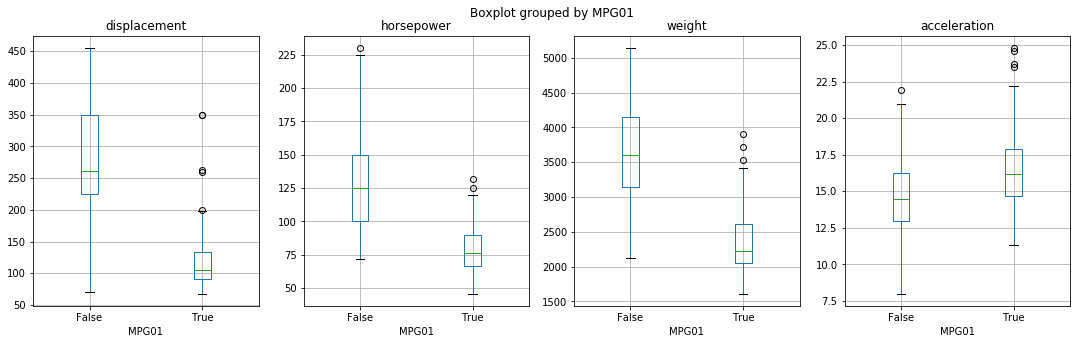

In [17]:


fig, ( ax2, ax3,ax4,ax5) = plt.subplots(1,4, figsize=(18,5))

at.boxplot(['displacement'], by='MPG01', ax=ax2)
at.boxplot(['horsepower'], by='MPG01', ax=ax3)
at.boxplot(['weight'],by='MPG01',ax=ax4)
at.boxplot(['acceleration'], by='MPG01', ax=ax5)



### part c

In [18]:
n_samples = 250
rows_sample = np.random.choice([True, False], n_samples)
atTrain = at.loc[rows_sample]
atTest = at.loc[~rows_sample]

In [19]:
predictors = ['displacement','horsepower', 'weight', 'acceleration']
pred_train =  atTrain[predictors].values
mpg_train = atTrain['MPG01'].values

pred_test = atTest[predictors].values
mpg_test = atTest['MPG01'].values

LDA_clf = LDA(solver='lsqr',store_covariance=True)
LDA_clf.fit(pred_train,mpg_train)

print('Class Priors =', LDA_clf.priors_)
print('Class Means =', LDA_clf.means_[0], LDA_clf.means_[1])
print('Coeffecients =', LDA_clf.coef_)


mpg_predicted = LDA_clf.predict(pred_test)
print('The error rate of the LDA model is ',np.mean(mpg_predicted!=mpg_test))

Class Priors = [0.63636364 0.36363636]
Class Means = [ 287.94047619  134.3452381  3693.60714286   14.33333333] [ 104.54166667   78.29166667 2223.5625       16.55416667]
Coeffecients = [[-0.04946214  0.04704727 -0.00146785 -0.30826663]]
The error rate of the LDA model is  0.13559322033898305


### part d

In [20]:
QDA_clf = QDA()
QDA_clf.fit(pred_train,mpg_train)

print('Class Priors =', QDA_clf.priors_)
print('Class Means =', QDA_clf.means_[0], QDA_clf.means_[1])

mpgqda_predicted = QDA_clf.predict(pred_test)
print('The error rate of the QDA model is ',np.mean(mpgqda_predicted!=mpg_test))


Class Priors = [0.63636364 0.36363636]
Class Means = [ 287.94047619  134.3452381  3693.60714286   14.33333333] [ 104.54166667   78.29166667 2223.5625       16.55416667]
The error rate of the QDA model is  0.1016949152542373


### part e

In [21]:

pred_train = sm.add_constant(atTrain[predictors])
pred_test = sm.add_constant(atTest[predictors])


glm11 = sm.Logit(mpg_train,pred_train)
glm11results = glm11.fit()
print(glm11results.summary()) 
print(' Correlations  ' , atTrain[predictors].corr())

glmtest_predictions = glm11results.predict(pred_test)
mpgglm_predicted = np.array(glmtest_predictions > 0.5, dtype=bool)
print('The error rate of the logistic model is ',np.mean(mpgglm_predicted!=mpg_test))



Optimization terminated successfully.
         Current function value: 0.144763
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  132
Model:                          Logit   Df Residuals:                      127
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:                  0.7791
Time:                        21:27:09   Log-Likelihood:                -19.109
converged:                       True   LL-Null:                       -86.524
                                        LLR p-value:                 3.608e-28
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.8350     10.455      3.045      0.002      11.344      52.326
displacement    -0.051

### part g

In [22]:
pred_train =  atTrain[predictors].values
mpg_train = atTrain['MPG01'].values

pred_test = atTest[predictors].values
mpg_test = atTest['MPG01'].values


train_error_rate = np.zeros(10)
test_error_rate = np.zeros(10)
K = np.arange(1,11)

for i, j in enumerate(K):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(pred_train,mpg_train)
    
    # use the model on the training data to get training error rate
    y_train_predicted = knn.predict(pred_train)
    # compute the training error rate for this k-value
    train_error_rate[i] = np.mean(y_train_predicted!=mpg_train)
    
    # Use the model on the held out test data
    mpg_test_predicted = knn.predict(pred_test)
    # compute the error rate for this k-value
    test_error_rate[i] = np.mean(mpg_test_predicted!=mpg_test)
    
print('The test error rate for k = 1 - 10 are: ', test_error_rate)


The test error rate for k = 1 - 10 are:  [0.13559322 0.11016949 0.07627119 0.09322034 0.09322034 0.11016949
 0.09322034 0.07627119 0.07627119 0.06779661]


## 4.7.12

### part a

### part b

In [23]:
def power():
    """ print 2**3 """
    print(2**3)
    
power()

8


In [24]:

def power2(x,a):
    """ print x to the power of a """
    print(x**a)
    
power2(3,8)


6561


### part c

In [25]:
power2(10,3)
power2(8,17)
power2(131,3)

1000
2251799813685248
2248091


### part d

In [26]:
def power3(x,a):
    """ return x raised to a """
    return(x**a)

### part e

Text(0, 0.5, 'log(y)')

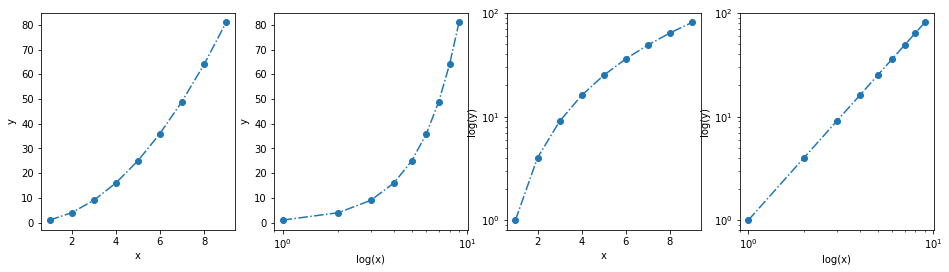

In [27]:
x = np.arange(1,10)
y = power3(x,2)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,4))

ax1.plot(x,y,linestyle='-.', marker='o')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.semilogx(x,y, linestyle='-.', marker='o')
ax2.set_xlabel('log(x)')
ax2.set_ylabel('y')

ax3.semilogy(x,y, linestyle='-.', marker='o')
ax3.set_xlabel('x')
ax3.set_ylabel('log(y)')

ax4.loglog(x,y, linestyle='-.', marker='o')
ax4.set_xlabel('log(x)')
ax4.set_ylabel('log(y)')



### part f

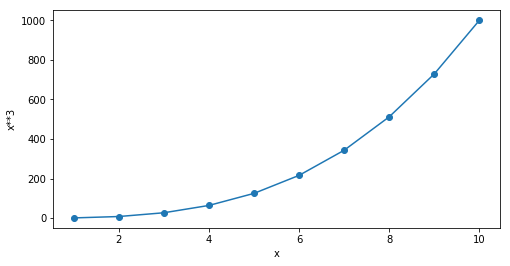

In [28]:
def plot_power(x,a):
    """Plots x vs x**a """
    y = x**a
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x,y, linestyle = '-', marker = 'o')
    ax.set_xlabel('x')
    ax.set_ylabel('x**'+str(a))
plot_power(np.arange(1,11),3)

## 4.7.13

In [29]:

BOS = load_boston()
predictors = BOS.data
response = BOS.target
boston_data = np.column_stack([predictors,response])
col_names = np.append(BOS.feature_names, 'MEDV')
BOS = pd.DataFrame(boston_data, columns = col_names)
BOS['CRIM01'] = pd.Series(BOS.CRIM > BOS.CRIM.median(), index=BOS.index)
BOS.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM01
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,False


In [30]:

rows = np.random.choice([True, False], 500)
BOS_train = BOS.loc[rows]
BOS_test = BOS.loc[~rows]

predictors = ['NOX', 'AGE', 'PTRATIO', 'LSTAT', 'MEDV']
PRED_train = sm.add_constant(BOS_train[predictors])
PRED_test = sm.add_constant(BOS_test[predictors])

CRIM_train = BOS_train.CRIM01.values
CRIM_test = BOS_test.CRIM01.values

glm13 = sm.Logit(CRIM_train, PRED_train)
glm13results = glm13.fit()
print(glm13results.summary())

Optimization terminated successfully.
         Current function value: 0.251645
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  240
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Feb 2019   Pseudo R-squ.:                  0.6347
Time:                        21:27:10   Log-Likelihood:                -60.395
converged:                       True   LL-Null:                       -165.35
                                        LLR p-value:                 2.160e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.3639      6.337     -5.738      0.000     -48.785     -23.943
NOX           46.6091      7.

In [31]:
CRIM_predicted = glm13results.predict(PRED_test) > 0.5
print('The error rate of the logistic model is ',np.mean(CRIM_predicted!=CRIM_test))

The error rate of the logistic model is  0.1346153846153846


In [32]:

PRED_train = BOS_train[predictors].values
PRED_test = BOS_test[predictors].values

CRIM_train = BOS_train.CRIM01.values
CRIM_test = BOS_test.CRIM01.values

LDA_clf = LDA(solver='lsqr',store_covariance=True)
LDA_clf.fit(PRED_train,CRIM_train)

print('Class Priors =', LDA_clf.priors_)
print('Class Means =', LDA_clf.means_[0], LDA_clf.means_[1])
print('Coeffecients =', LDA_clf.coef_)

LDACRIM_predicted = LDA_clf.predict(PRED_test)
print('The error rate of the LDA model is ',np.mean(LDACRIM_predicted!=CRIM_test))

Class Priors = [0.54583333 0.45416667]
Class Means = [ 0.47119008 51.55801527 17.94961832  9.64664122 24.33282443] [ 0.63705505 85.3587156  18.89816514 15.60963303 20.9293578 ]
Coeffecients = [[3.27552082e+01 7.36628035e-03 4.25451811e-01 2.61434203e-02
  1.27459137e-01]]
The error rate of the LDA model is  0.16923076923076924


In [33]:



train_error_rate = np.zeros(10)
test_error_rate = np.zeros(10)
K = np.arange(1,11)

for i, j in enumerate(K):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(PRED_train,CRIM_train)
    
    # use the model on the training data to get training error rate
    CRIM_train_predicted = knn.predict(PRED_train)
    # compute the training error rate for this k-value
    train_error_rate[i] = np.mean(CRIM_train_predicted!=CRIM_train)
    
    # Use the model on the held out test data
    CRIM_test_predicted = knn.predict(PRED_test)
    # compute the error rate for this k-value
    test_error_rate[i] = np.mean(CRIM_test_predicted!=CRIM_test)
    
print('The test error rate for k = 1 - 10 are: ', test_error_rate)

print('The train error rate for k = 1 - 10 are: ', train_error_rate)

The test error rate for k = 1 - 10 are:  [0.28846154 0.35384615 0.21923077 0.23461538 0.20384615 0.21538462
 0.19230769 0.21923077 0.2        0.22692308]
The train error rate for k = 1 - 10 are:  [0.         0.14583333 0.14583333 0.19166667 0.175      0.18333333
 0.16666667 0.1875     0.19583333 0.2       ]
